In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline
pd.__version__
WORK_DIR = './'
%config InlineBackend.figure_format = 'svg'

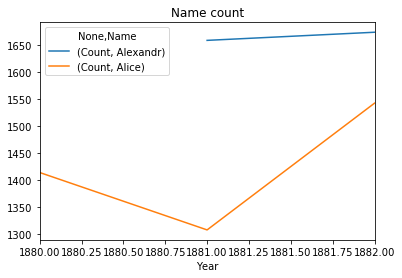

In [33]:
def plot_names_dynamics(names, form_year, to_year, year_step=1, plot_kind='line'):
    names_by_year = {}
    for year in range(form_year, to_year, year_step):
        names_by_year[year] = pd.read_csv(
            '{}t{}.txt'.format(WORK_DIR, year), names=['Name','Sex', 'Count']
            )
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    
    quer = name_dynamics.query('Name == {}'.format(names))
    quer.unstack('Name').plot(title='Name count', kind=plot_kind)
    
plot_names_dynamics(["Alice", "Alexandr"], 1880, 1884)

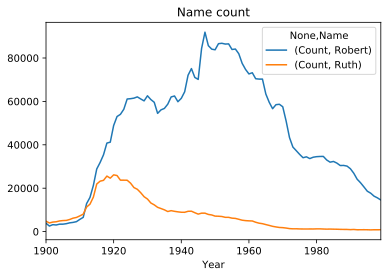

In [30]:
def plot_names_dynamics(names, form_year, to_year, year_step=1):
    names_by_year = {}
    for year in range(form_year, to_year, year_step):
        names_by_year[year] = pd.read_csv(
            '{}yob{}.txt'.format(WORK_DIR, year), names=['Name','Sex', 'Count']
            )
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    
    quer = name_dynamics.query('Name == {}'.format(names))
    quer.unstack('Name').plot(title='Name count')
    
plot_names_dynamics(["Ruth", "Robert"], 1900, 2000)

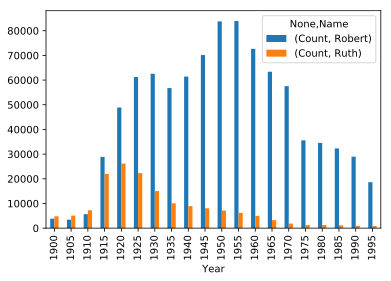

In [53]:
def plot_names_dynamics_combined(names, form_year, to_year, year_step=1):
    names_by_year = {}
    for year in range(form_year, to_year, year_step):
        names_by_year[year] = pd.read_csv(
            '{}yob{}.txt'.format(WORK_DIR, year), names=['Name','Sex', 'Count']
            )
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    quer = name_dynamics.query('Name == {}'.format(names)).unstack('Name').plot.bar()

plot_names_dynamics_combined(["Ruth", "Robert"], 1900, 2000, 5)

         Name Sex  Count
6114   Robert   M  83575
6119  Richard   M  51014
6124   Ronald   M  29917
6139    Roger   M  12551
6143  Raymond   M  11180
35    Rebecca   F   9426
48       Ruth   F   7128
6163      Roy   M   6459
55       Rita   F   6425
6164    Ralph   M   6406


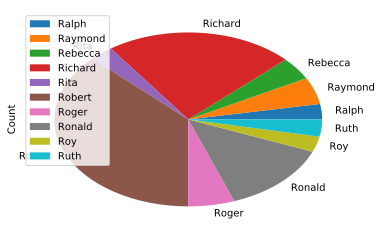

In [47]:
def plot_names_top10_strats_with(start_letter, year):
    names_stats = pd.read_csv( 
        '{}yob{}.txt'.format(WORK_DIR, year), names=['Name','Sex', 'Count']
        ) 
    req_names = names_stats[names_stats['Name'].str.startswith(start_letter)].sort_values(
                by='Count', ascending=False
                ).head(10)
    req_names.groupby('Name').sum().plot.pie(y='Count')

plot_names_top10_strats_with('R', 1950)

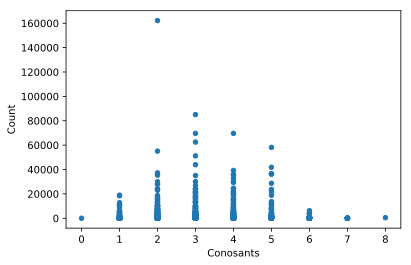

In [133]:
def count_conosants(in_str):
    conosants = ('b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'z')
    conosant_counter = 0
    for letter in in_str.lower():
        if letter in conosants:
            conosant_counter += 1
    return conosant_counter

def mega_function(row):
    print(type(row))
    print(row)
    
def plot_names_conosants(form_year, to_year):
    names_by_year = {}
    for year in range(form_year, to_year):
        names_by_year[year] = pd.read_csv(
            '{}yob{}.txt'.format(WORK_DIR, year), names=['Name','Sex', 'Count']
            )
    names_all = pd.concat(names_by_year)
    name_dynamics = names_all.groupby('Name').sum()
    name_dynamics.reset_index(inplace=True)
    name_dynamics['Conosants'] = name_dynamics.apply(lambda row: count_conosants(row.Name), axis=1)    
    #print(name_dynamics.head(10))
    name_dynamics.plot.scatter(x='Conosants', y='Count')
    
plot_names_conosants(1900,1910)
